# Router-Expert Alignment Analysis

This notebook provides complete analysis of result files:
1. **Comparison Analysis**: Compare all result files side by side with comparison plots and diagnostic plots
2. **Individual File Analysis**: Detailed analysis and plots for each result file (separate sections)
3. **HTML Report**: Generate comprehensive HTML report matching this notebook structure

**Note**: All analysis is done from existing result files - no re-running of computations.


## Setup and Configuration


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 120)

from src.analysis import (
    ResultAnalyzer,
    generate_notebook_html,
    generate_single_file_plots,
    compare_runs,
    load_results,
)
from pathlib import Path
from IPython.display import Image, display
import base64


In [2]:
# Configuration
LAYER = 10  # Layer to analyze

print(f"Configuration:")
print(f"  Layer: {LAYER}")
print(f"  Working with existing result files (no re-computation)")


Configuration:
  Layer: 10
  Working with existing result files (no re-computation)


## 1. Comparison Analysis - All Result Files

Compare all result files side by side with comparison plots and diagnostic plots.


Comparing 5 result file(s) (all layers):
  - layer5_svd_k1-4096-13_shuffles200_seed42_20251227_155631.json
  - layer10_svd_k1-4096-13_shuffles200_seed42_20251227_152925.json
  - layer13_svd_k1-4096-13_shuffles200_seed42_20251227_150946.json
  - layer1_svd_k1-4096-13_shuffles200_seed42_20251227_143429.json
  - layer2_svd_k1-4096-13_shuffles200_seed42_20251227_140227.json

Comparison of runs:
   k    align  delta_vs_shuffle  z_vs_shuffle  effect_over_random  cos_squared                      run       timestamp
   1 0.072366          0.063612      2.790334            0.072121     0.072366  L5_s200_20251227_155631 20251227_155631
   2 0.072696          0.062340      2.555272            0.072208     0.000000  L5_s200_20251227_155631 20251227_155631
   4 0.074890          0.064735      2.673774            0.073913     0.000000  L5_s200_20251227_155631 20251227_155631
   8 0.076754          0.064113      2.463954            0.074800     0.000000  L5_s200_20251227_155631 20251227_155631
  16 0

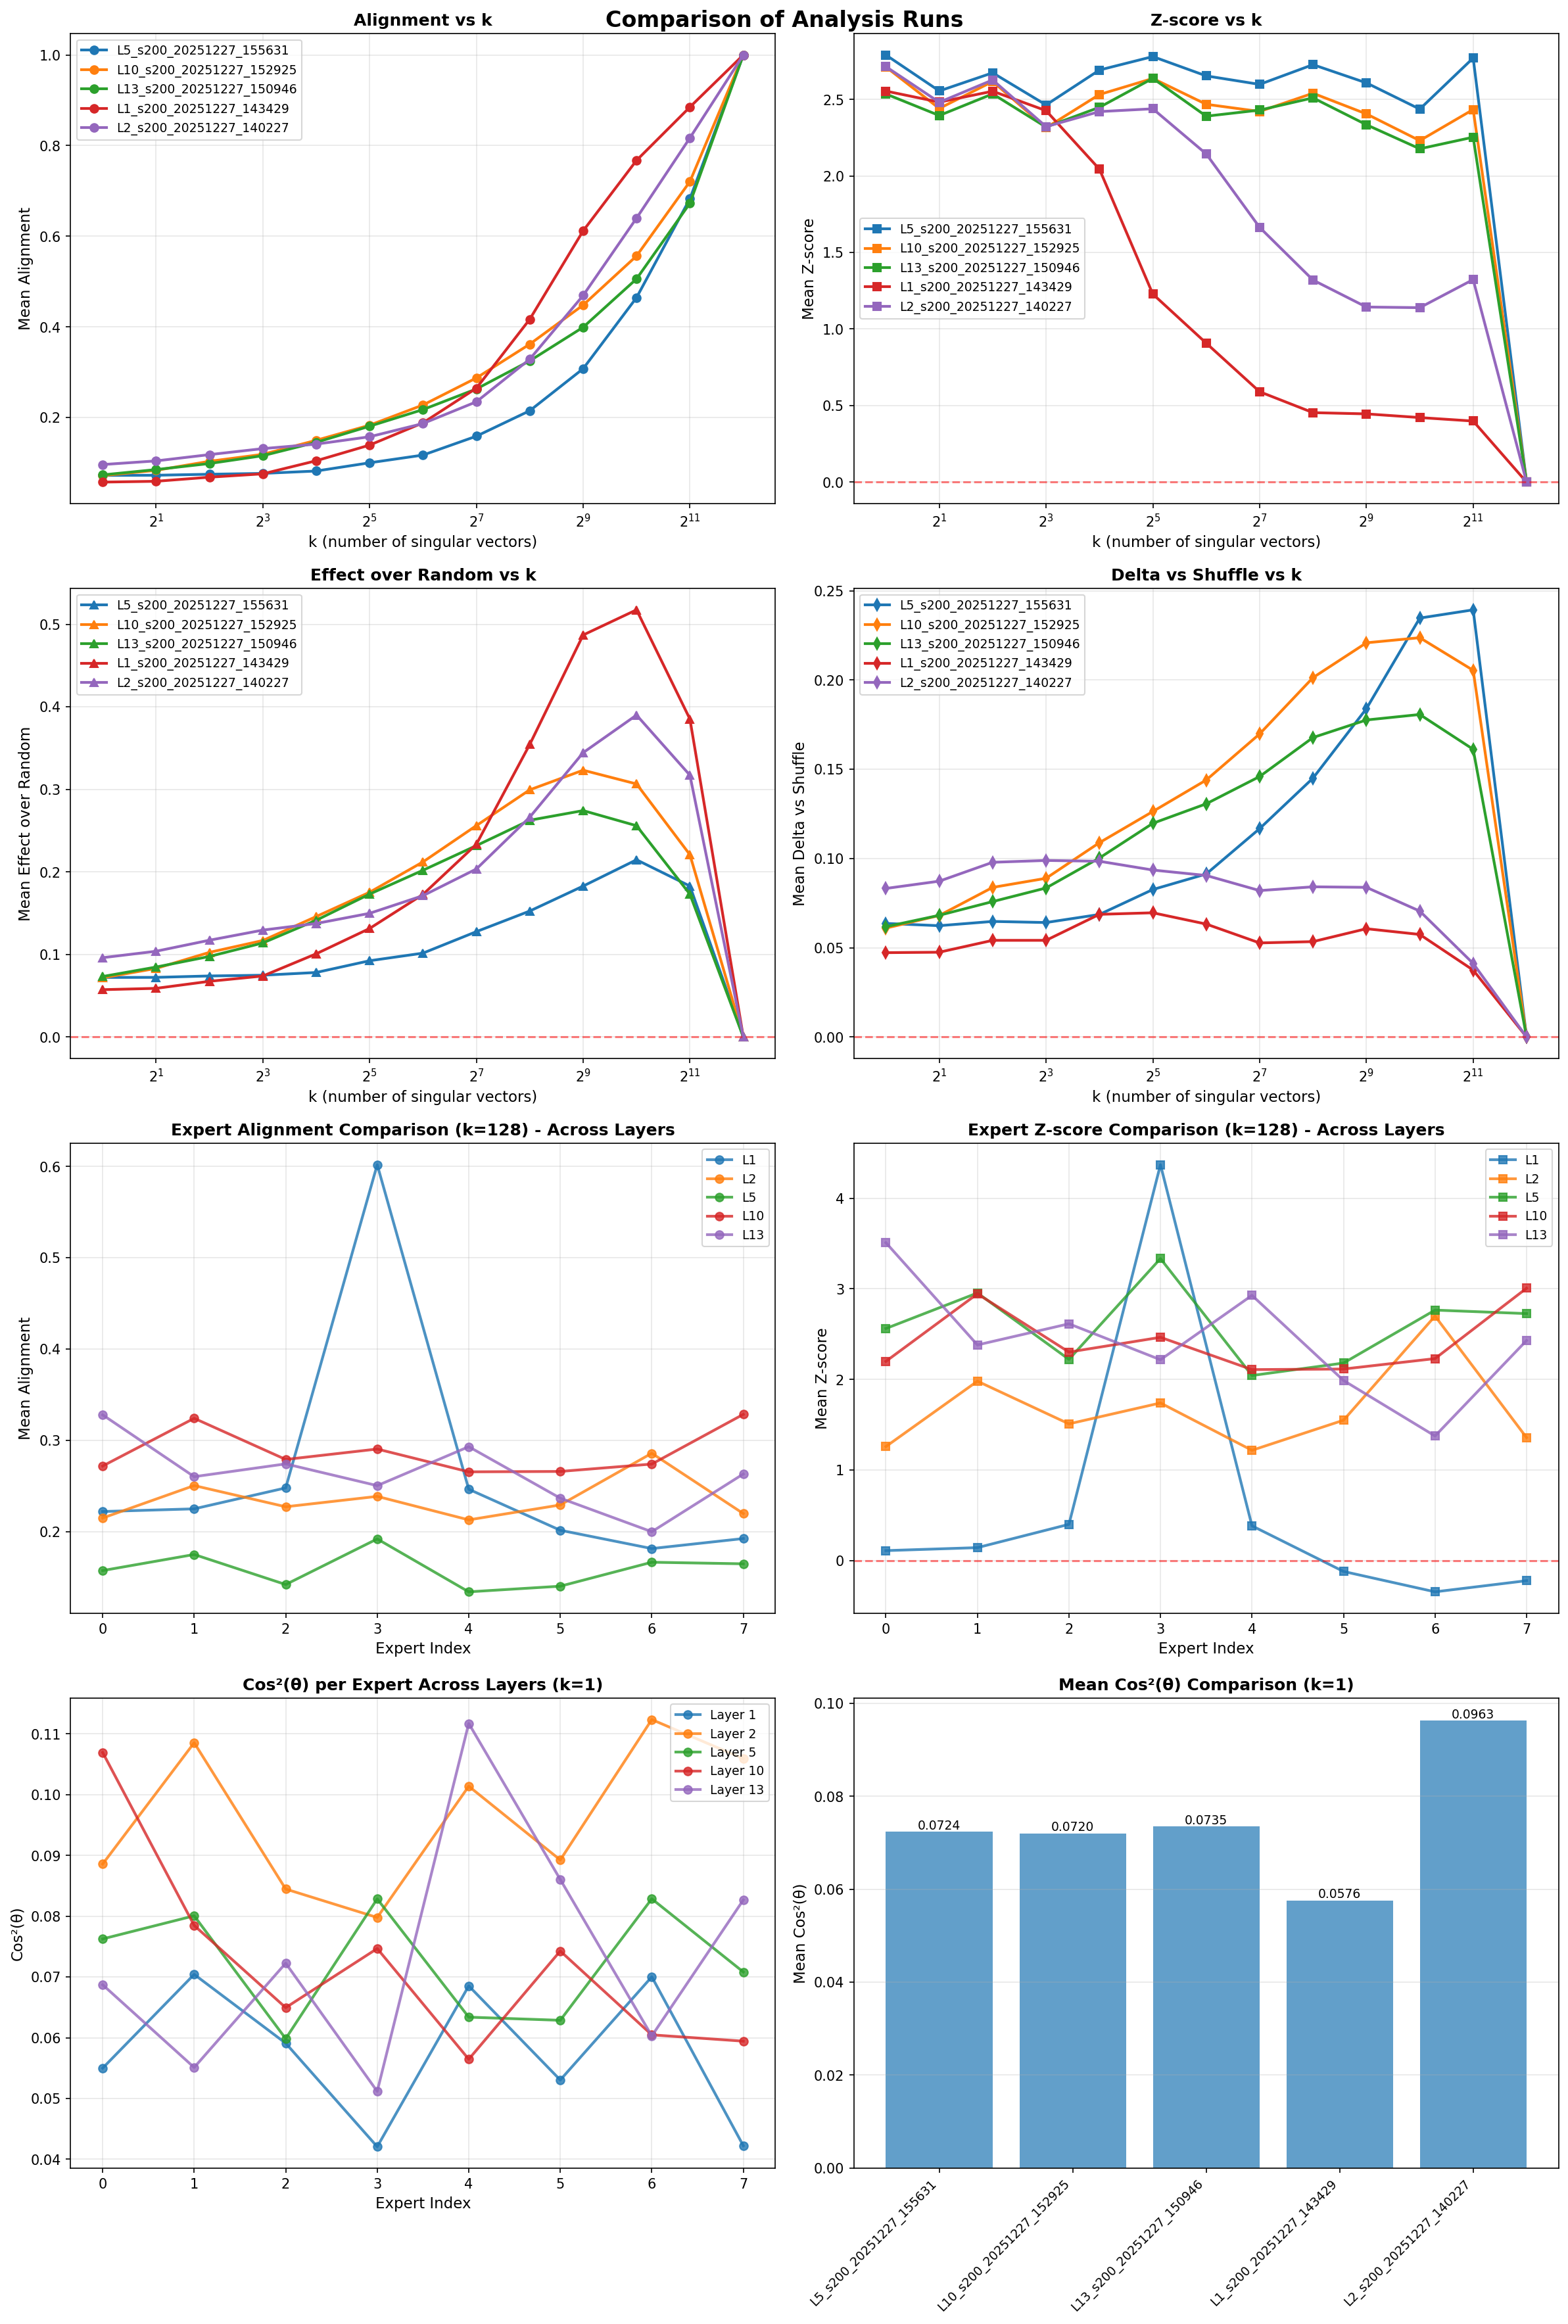


Diagnostic Plots (showing both runs on same plots)


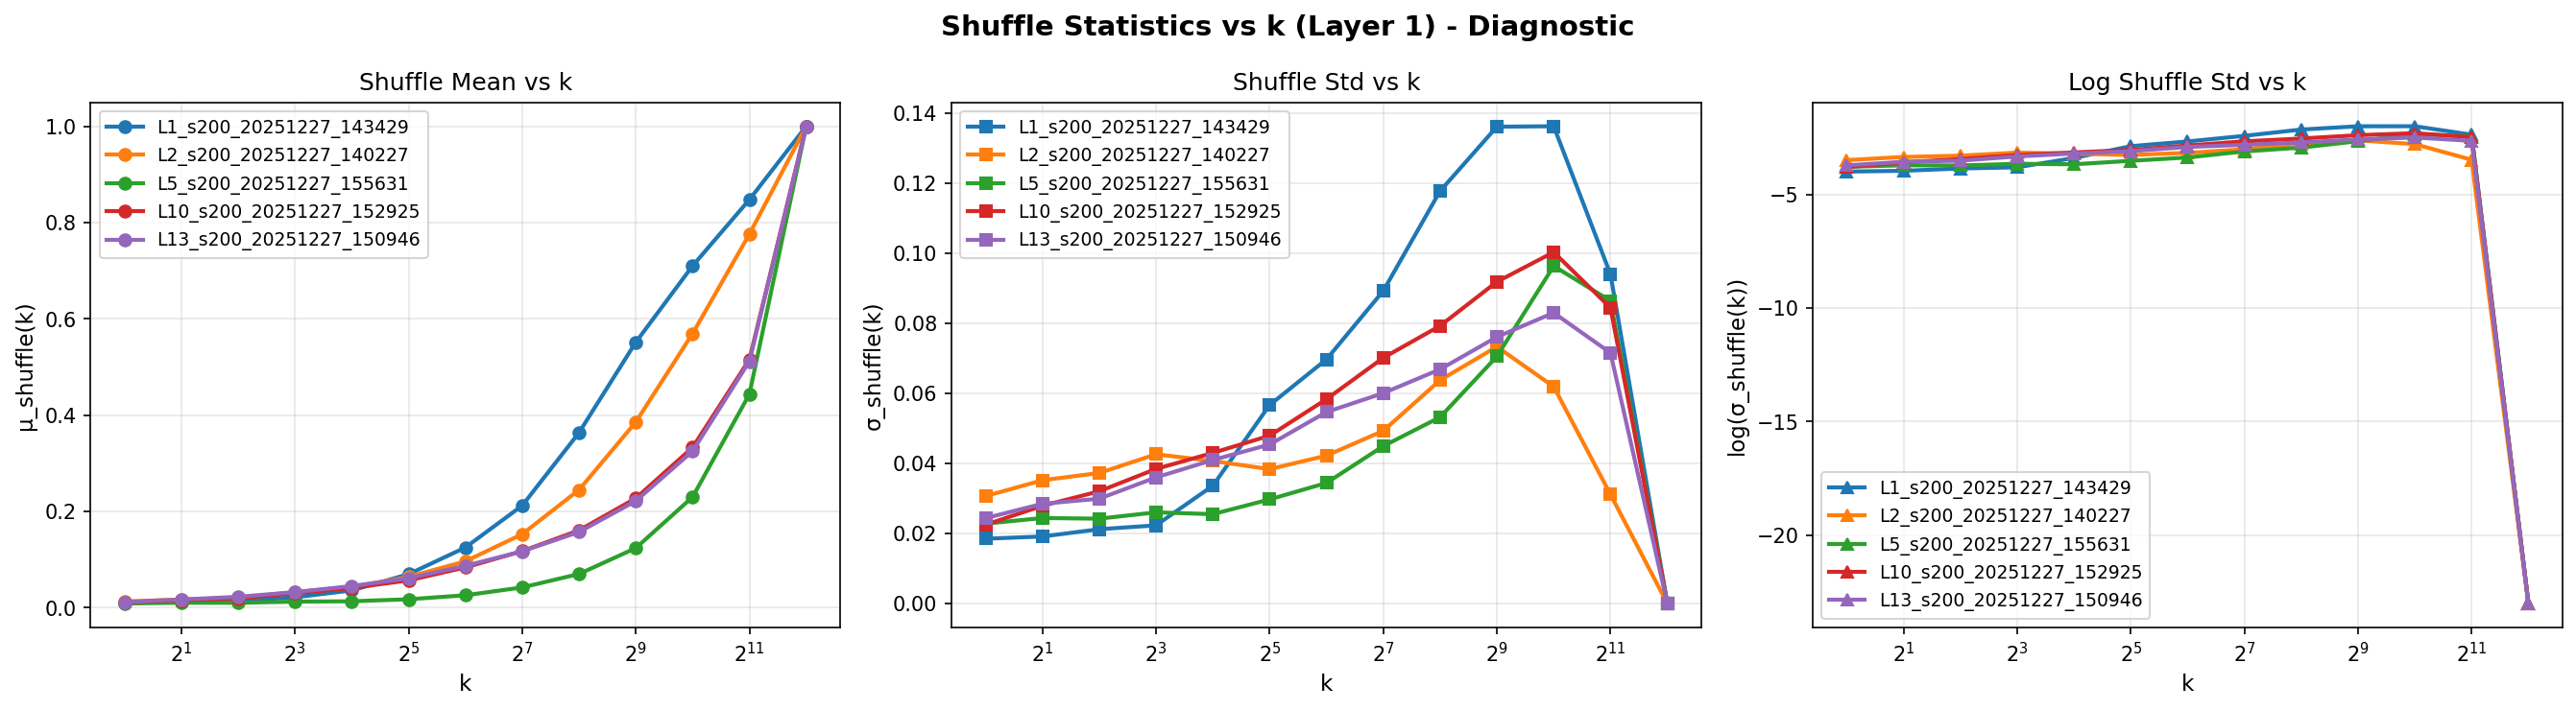

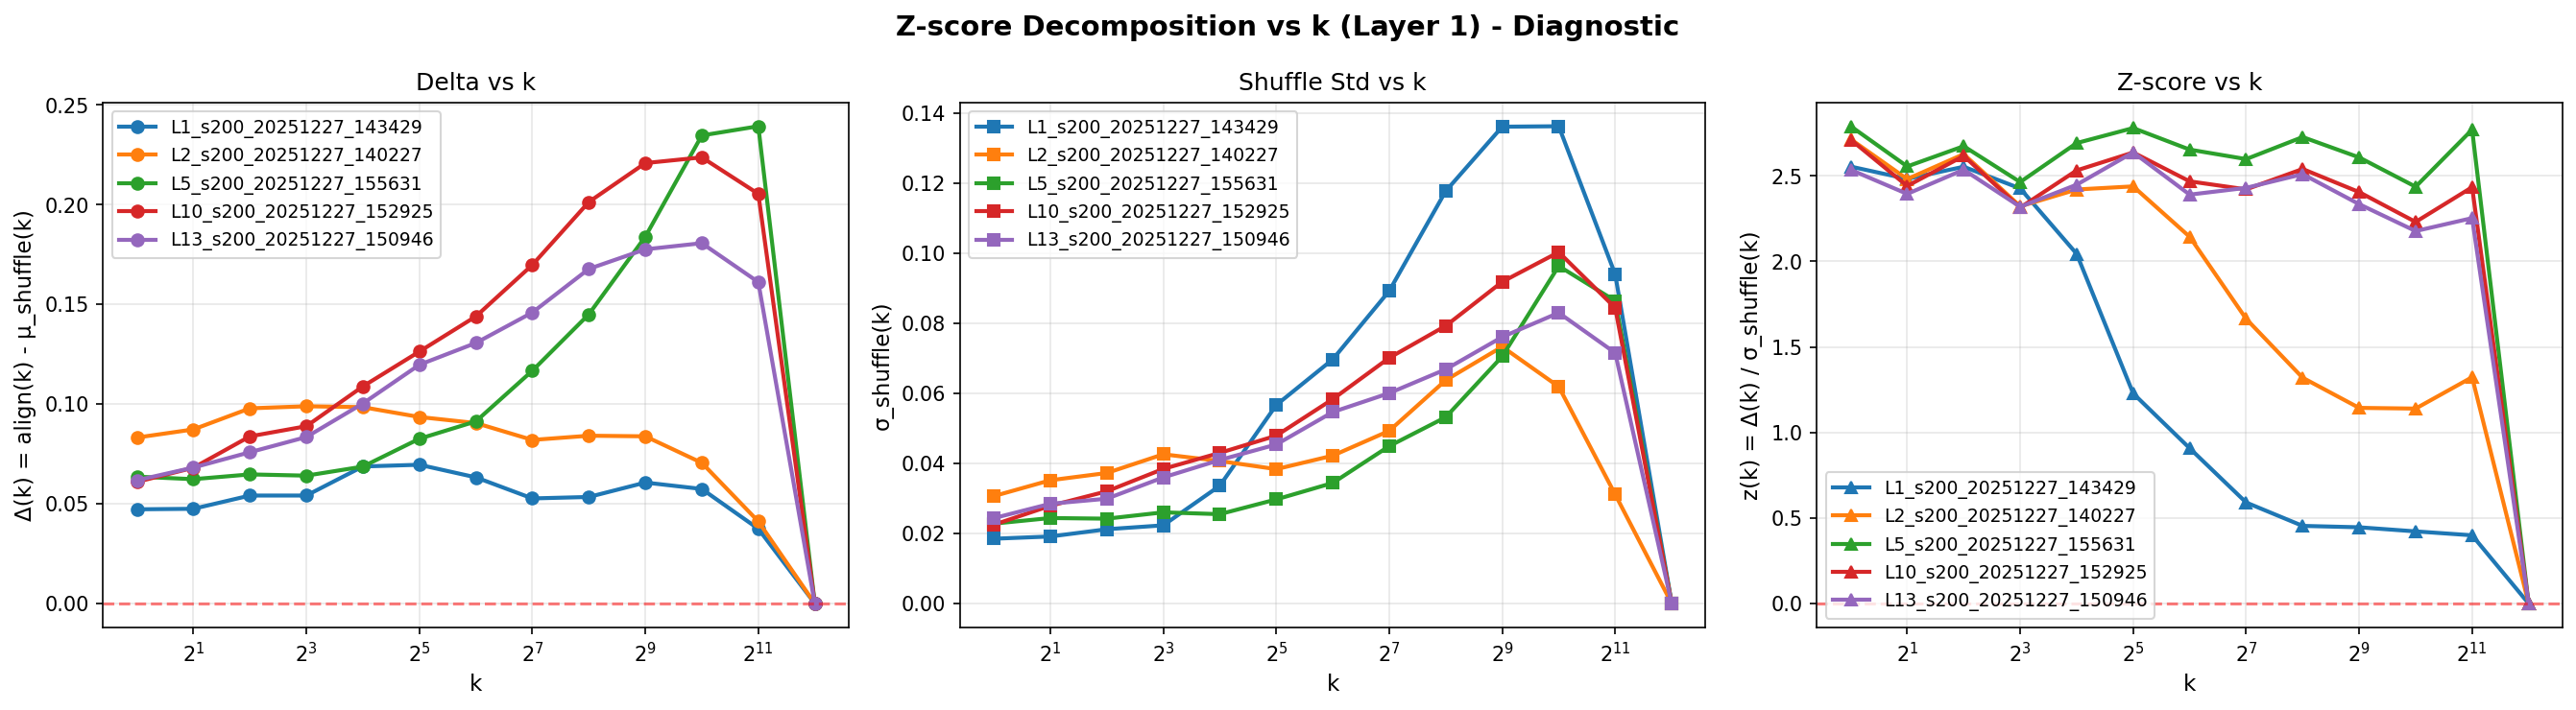

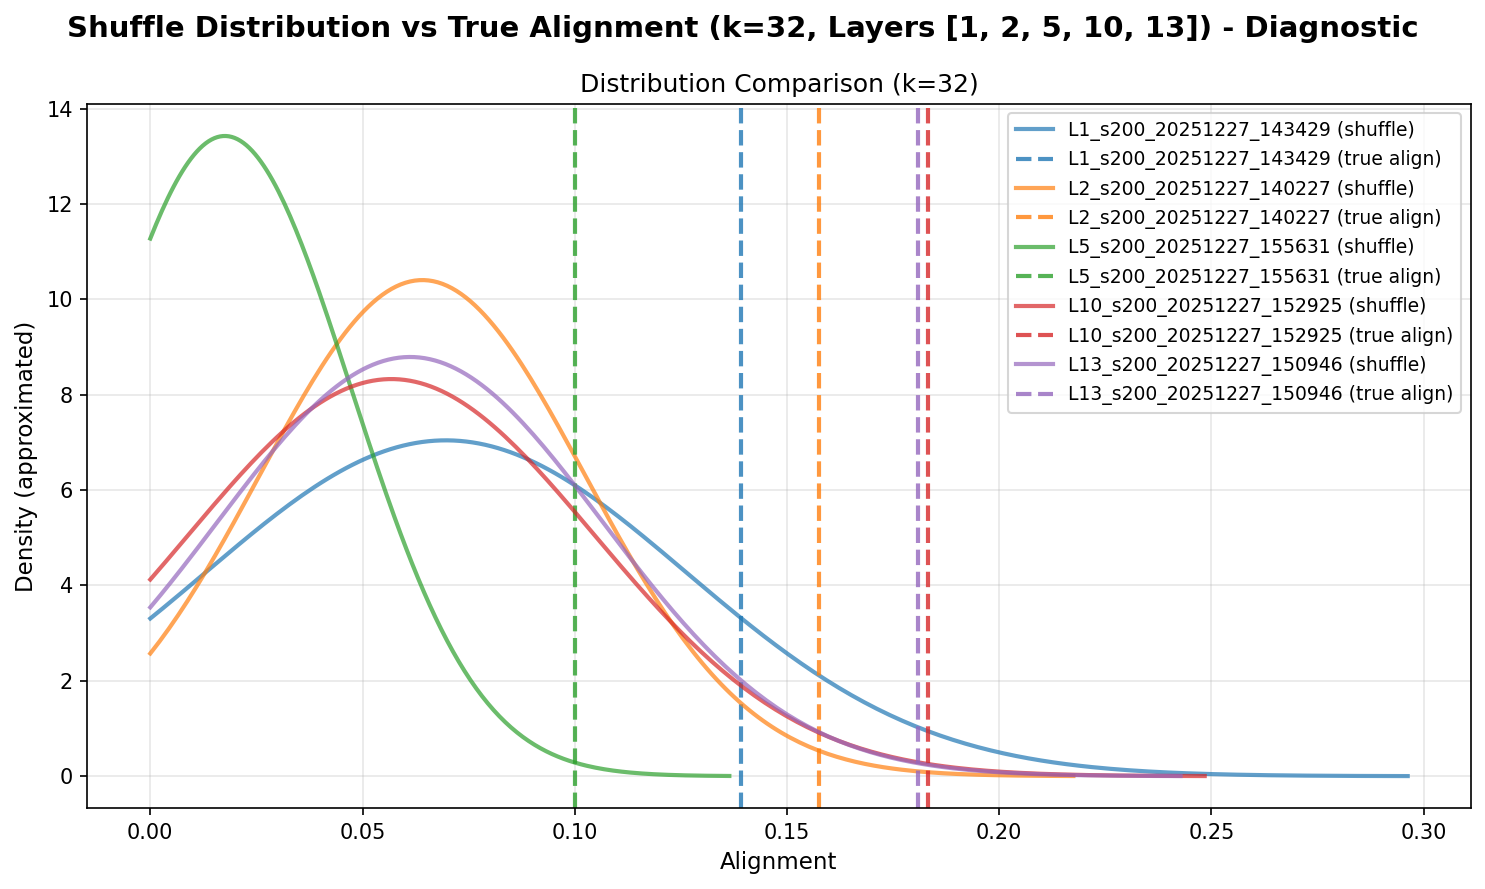

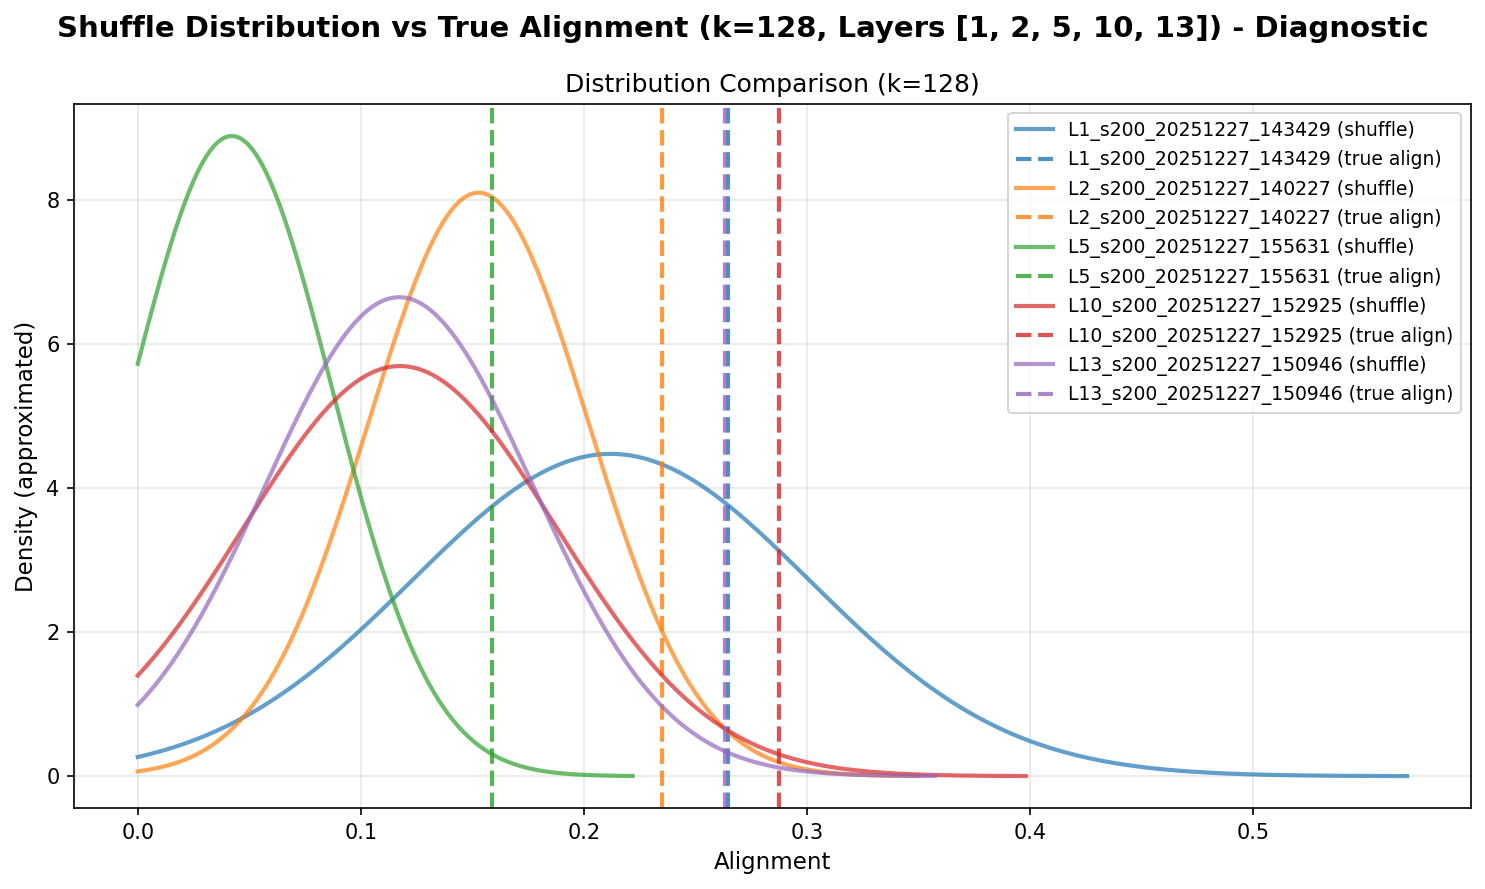

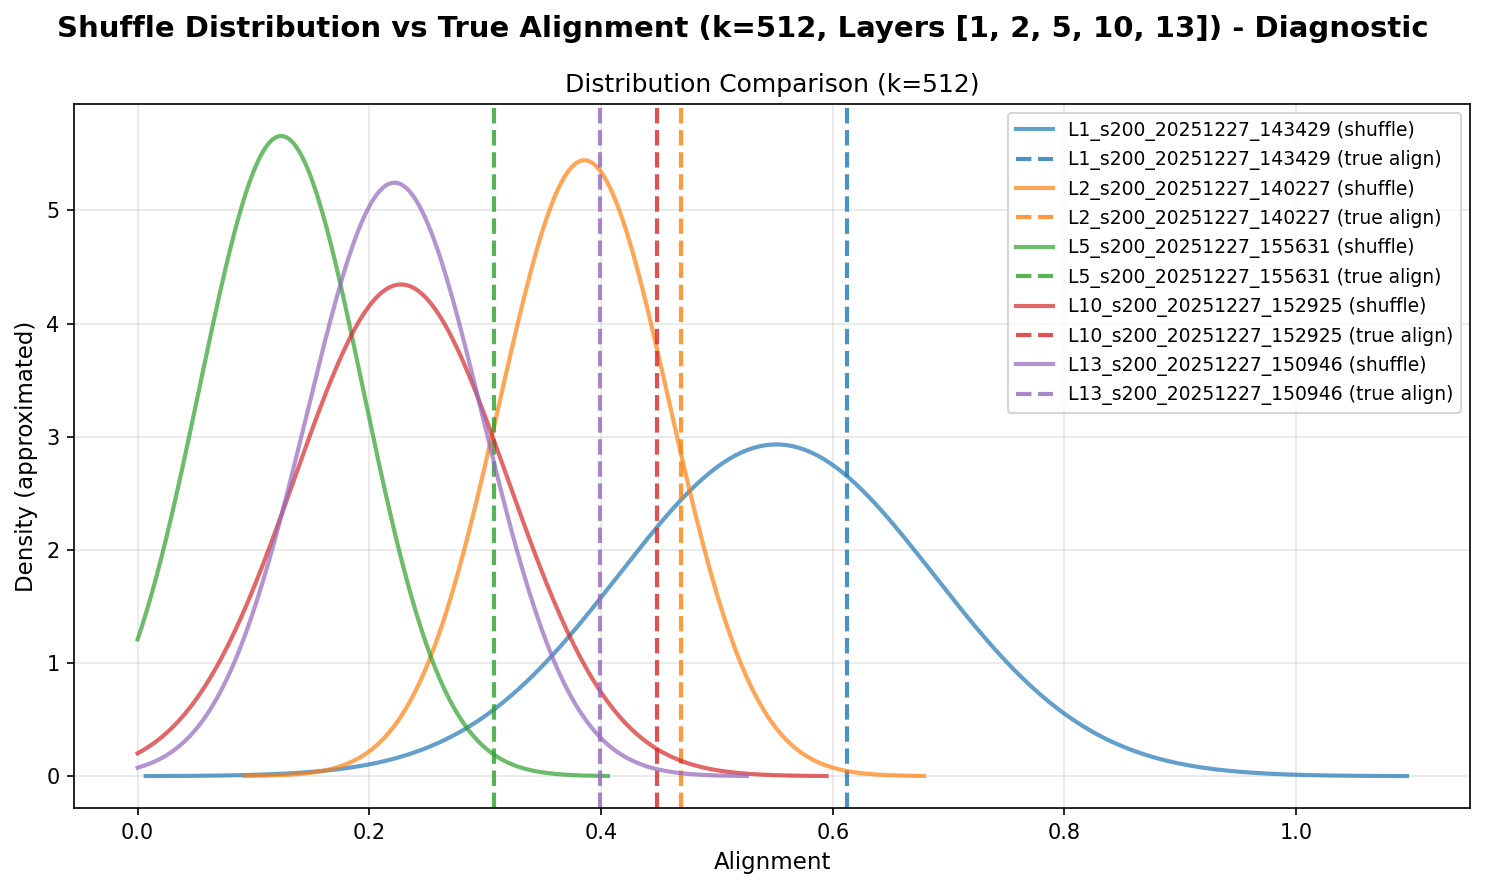

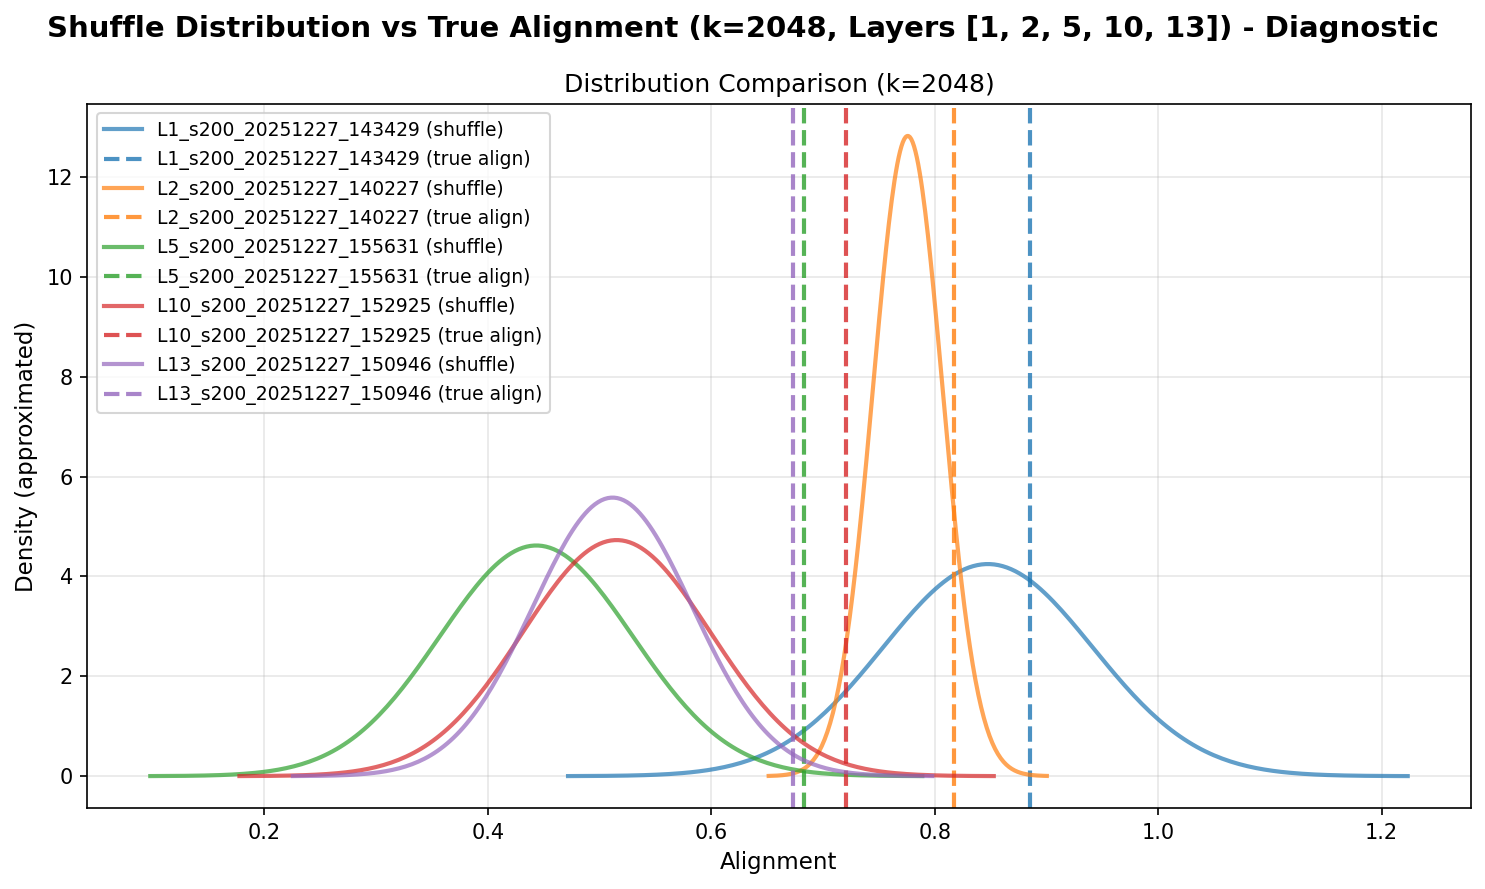

/Users/noyah/University/ILLM project/GaleMoE/src/analysis/reporting/results.py:975: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


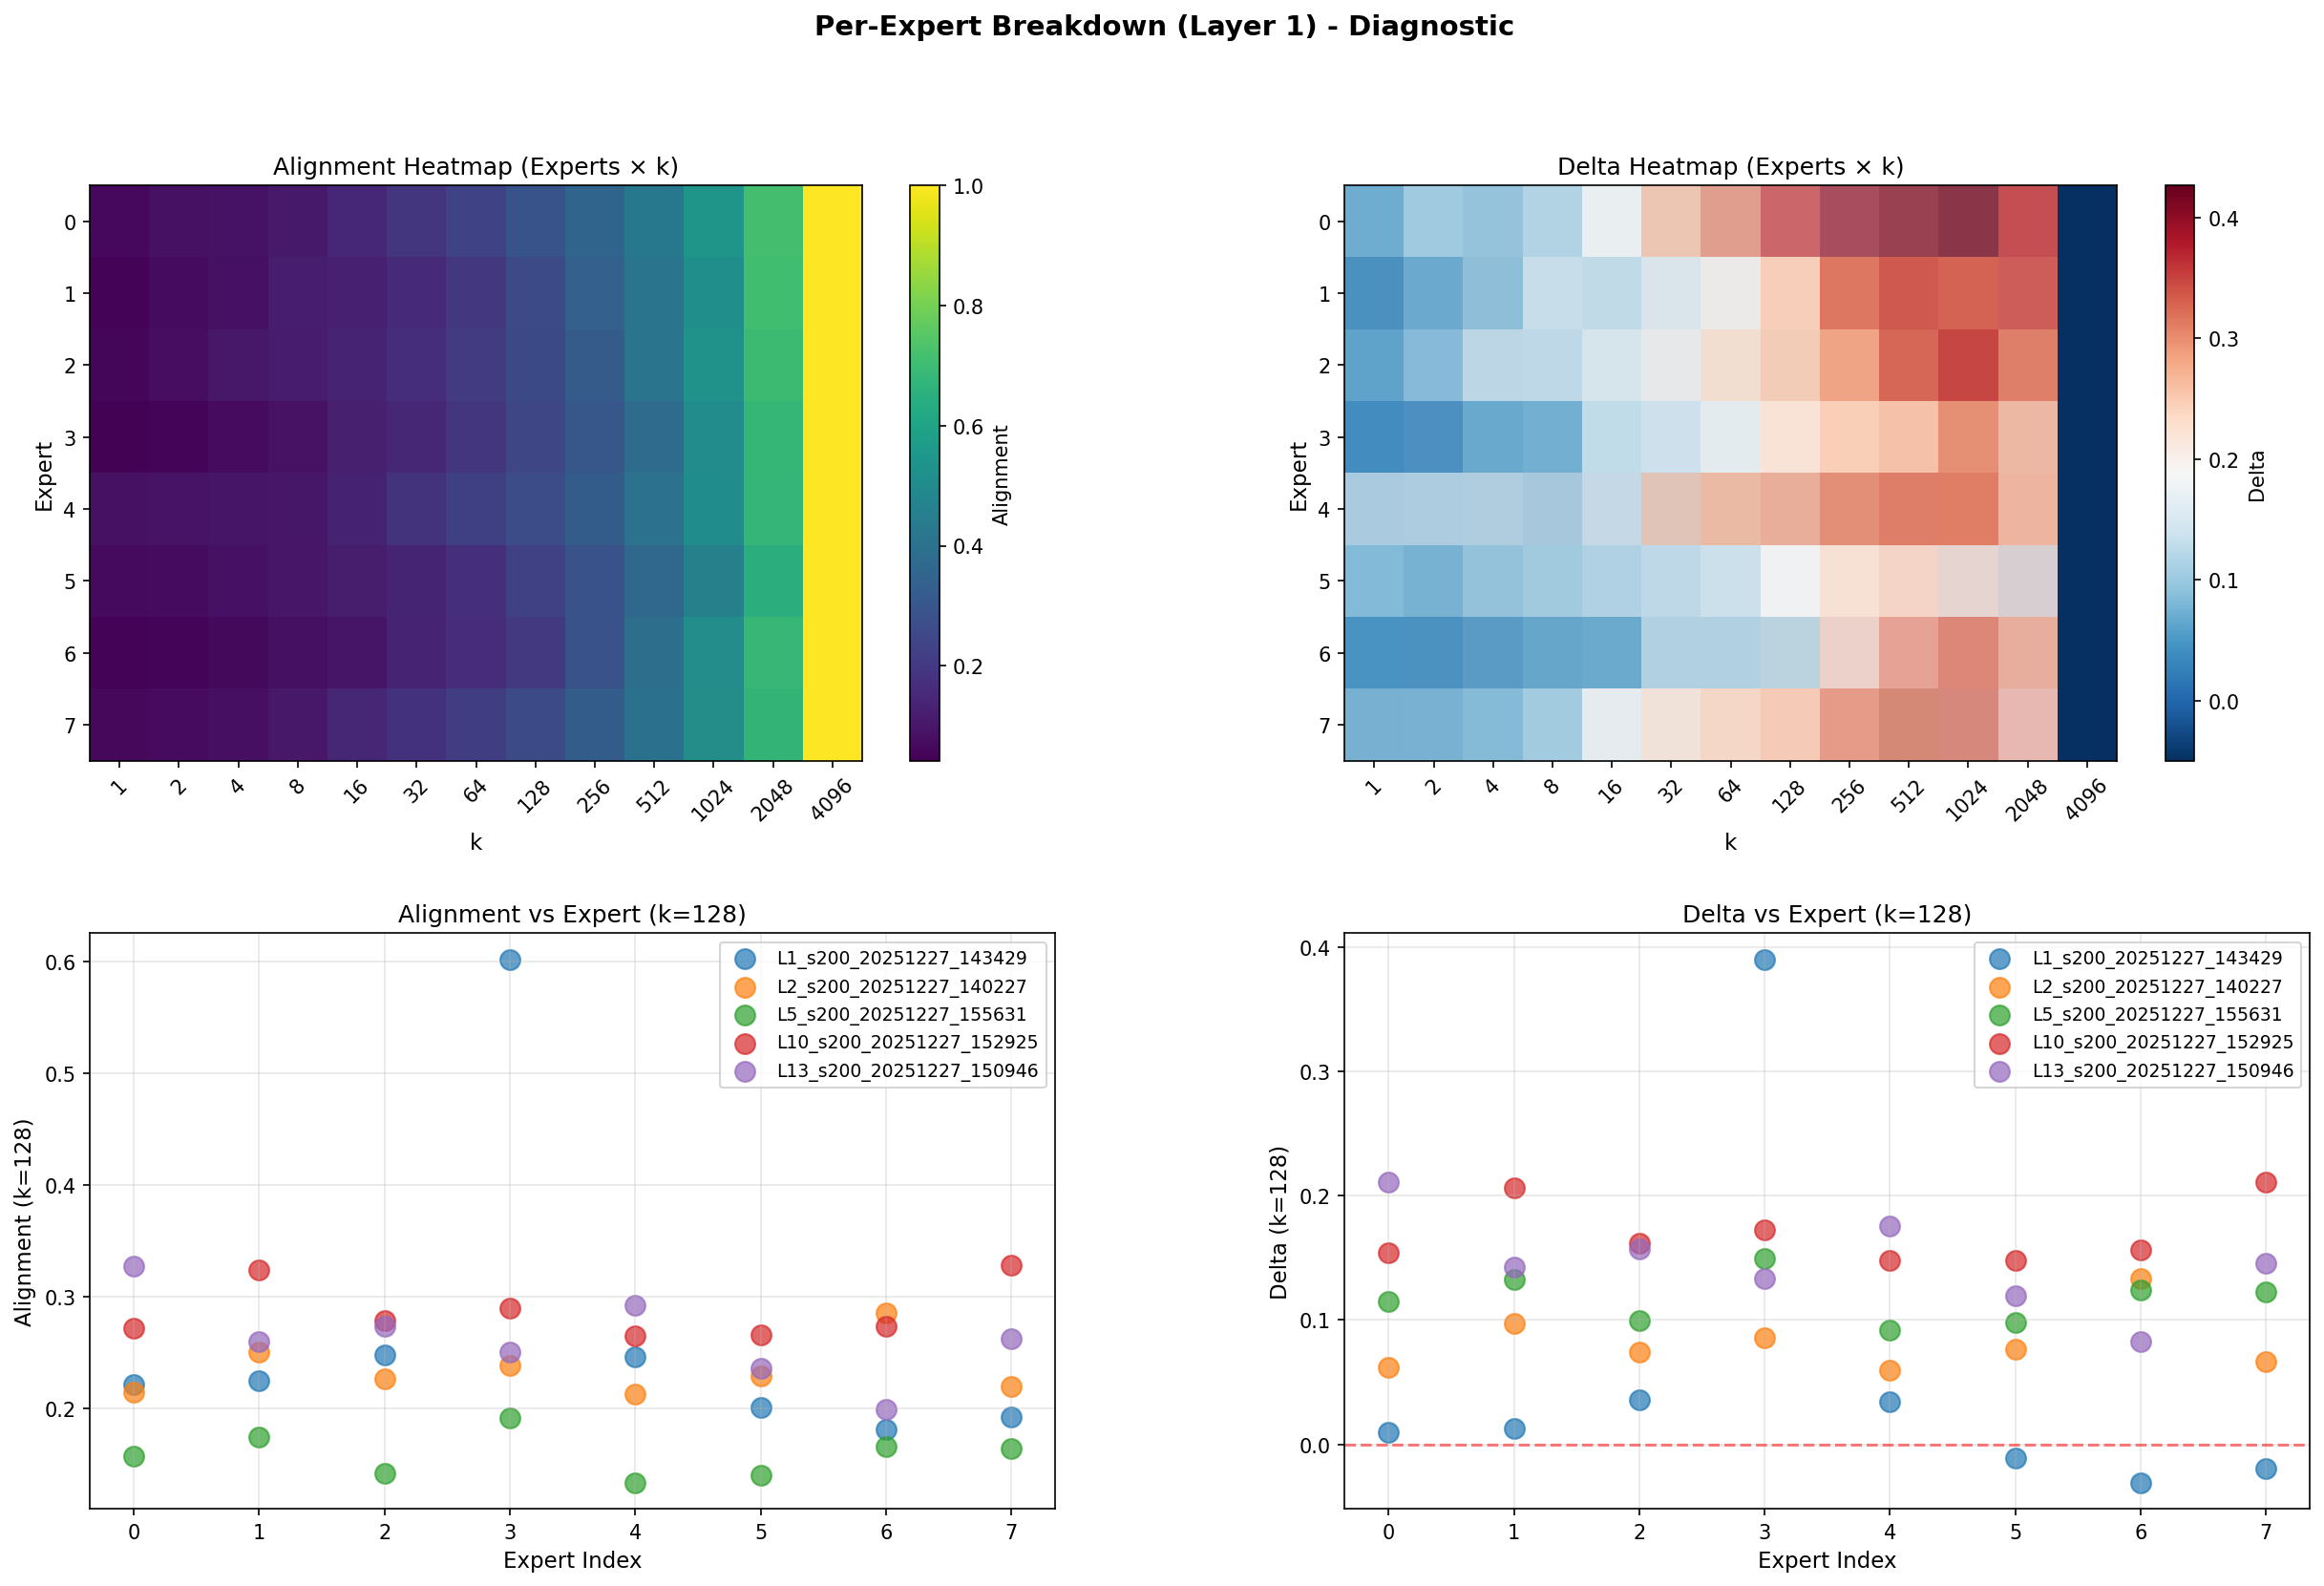


✓ Comparison complete!


In [3]:
# Compare ALL result files (across all layers)
analyzer = ResultAnalyzer()
all_result_files = analyzer.list_results(layer=None)  # Get all files, not filtered by layer

if len(all_result_files) > 0:
    result_files = [str(f) for f in all_result_files]
    
    print(f"Comparing {len(result_files)} result file(s) (all layers):")
    for f in result_files:
        print(f"  - {Path(f).name}")
    print("=" * 60)
    
    # Generate comparison plots (will display in notebook)
    comparison_df = compare_runs(result_files, show_plots=True, diagnostic=True)
    
    print("\n✓ Comparison complete!")
else:
    print("No result files found")


## 2. Individual File Analysis

Detailed analysis and plots for each result file. Each file is analyzed in its own section for easy navigation.


# Generate individual analysis for each result file
analyzer = ResultAnalyzer()
all_result_files = analyzer.list_results(layer=None)  # Get all files

if len(all_result_files) > 0:
    result_files = [str(f) for f in all_result_files]
    print(f"Analyzing {len(result_files)} result file(s) individually...")
    print("=" * 60)
    
    # Process each file
    for idx, filepath in enumerate(result_files):
        print(f"\n{'='*60}")
        print(f"Run {idx + 1}: {Path(filepath).name}")
        print("="*60)
        
        # Load and display results
        metadata, results = load_results(filepath)
        df = pd.DataFrame([r.__dict__ for r in results])
        
        print(f"\nModel: {metadata.get('model_id', 'unknown')}")
        print(f"Layer: {metadata.get('layer', 'unknown')}")
        print(f"Method: {metadata.get('method', 'unknown')}")
        print(f"K values: {metadata.get('k_list', 'unknown')}")
        print(f"Shuffles: {metadata.get('n_shuffles', 'unknown')}")
        print(f"Seed: {metadata.get('seed', 'unknown')}")
        print(f"Total results: {len(results)}")
        print(f"Experts: {metadata.get('n_experts', 'unknown')}")
        
        # Summary statistics
        summary_cols = ["align", "delta_vs_shuffle", "z_vs_shuffle", "effect_over_random"]
        summary = df.groupby("k")[summary_cols].mean()
        print("\nSummary Statistics (averaged across experts):")
        print("-" * 60)
        print(summary)
        
        # Cos²(θ) alignment for k=1
        if 1 in df["k"].values:
            k1_results = df[df["k"] == 1]
            print("\nCos²(θ) Alignment Summary (k=1):")
            print("-" * 60)
            print(f"Mean cos²(θ): {k1_results['cos_squared'].mean():.6f}")
            print(f"Max cos²(θ):  {k1_results['cos_squared'].max():.6f}")
            print(f"Min cos²(θ):  {k1_results['cos_squared'].min():.6f}")
            print(f"Std cos²(θ):  {k1_results['cos_squared'].std():.6f}")
            print("\nPer-expert cos²(θ) values:")
            for _, row in k1_results.iterrows():
                print(f"  Expert {int(row['expert'])}: {row['cos_squared']:.6f} (align: {row['align']:.6f})")
        
        # Detailed results by K value
        print("\nDetailed Results by K Value:")
        print("-" * 60)
        for k in sorted(df["k"].unique()):
            k_data = df[df["k"] == k]
            print(f"K = {k}:")
            print(f"  Mean align: {k_data['align'].mean():.6f}")
            print(f"  Mean z-score: {k_data['z_vs_shuffle'].mean():.2f}")
            print(f"  Mean effect over random: {k_data['effect_over_random'].mean():.6f}")
        
        # Generate comprehensive plots for this file
        print(f"\nGenerating comprehensive plots for Run {idx + 1}...")
        print("-" * 60)
        plots = generate_single_file_plots(filepath, save_to_file=False, display_in_notebook=True)
        print(f"✓ Complete analysis plot generated and displayed above for Run {idx + 1}")
        
        print("\n" + "="*60)
else:
    print("No result files available.")


## 3. Generate HTML Report

Generate a comprehensive HTML report matching this notebook's content.


In [4]:
# Generate HTML report with ALL result files (across all layers)
analyzer = ResultAnalyzer()
all_result_files = analyzer.list_results(layer=None)  # Get all files, not filtered by layer

if len(all_result_files) > 0:
    result_files = [str(f) for f in all_result_files]
    
    print(f"Generating HTML report from {len(result_files)} result file(s)...")
    print("=" * 60)
    
    # Generate HTML report with all files
    output_path = generate_notebook_html(
        result_files,
        output_path="results/report_all1.html",
        include_diagnostic_plots=True,
        include_comparison_plots=True
    )
    
    print(f"\n✓ HTML report generated: {output_path}")
    print(f"  - Includes {len(result_files)} result file(s)")
    print(f"  - Comparison plots: Yes")
    print(f"  - Diagnostic plots: Yes")
    print(f"  - Single file analysis: Yes")
    print(f"\nOpen {output_path} in your browser to view the complete report.")
else:
    print("No result files found")


Generating HTML report from 5 result file(s)...


/Users/noyah/University/ILLM project/GaleMoE/src/analysis/reporting/notebook_html.py:777: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ HTML report generated: results/report_all1.html

✓ HTML report generated: results/report_all1.html
  - Includes 5 result file(s)
  - Comparison plots: Yes
  - Diagnostic plots: Yes
  - Single file analysis: Yes

Open results/report_all1.html in your browser to view the complete report.
